# Text Analysis on movie reviews
## Sentiment Analysis
To Run this notebook below libraries should be installed:
>conda install -c conda-forge textblob

>ipython -m textblob.download_corpora

>conda install -c conda-forge spacy

>ipython -m spacy download en



### Created a dataset to perform sentiment analysis on imdb movie reviews and loaded the data into dataframe.This dataset has two dozen reviews and each review is labeled with star rating of range(1,10)

In [4]:
import pandas as pd

movie= pd.read_csv('Avengers.csv', delimiter = ',' , encoding = 'unicode_escape') 
movie.head(5)

,Rating,Review,Reviewer
0,9,There are some vague references to things that...,James Berardinelli
1,7,It must have taken a superhuman effort to pull...,JEFFREY M. ANDERSON
2,7,"Considered on its own, as a single, nearly 2-h...",A.O. Scott
3,8,If a movie can be defined by the strength of i...,Louise Keller
4,7,"Ten years and 18 Marvel movies; 19 now, with t...",MaryAnn Johanson


In [2]:
movie.dtypes  

Rating       int64
Review      object
Reviewer    object
dtype: object

In [3]:
movie.shape

(24, 3)

### Implementing TextBlob's Default Sentiment Analyzer

In [4]:
from textblob import TextBlob

Review = movie['Review']
blobs = [TextBlob(Review[i]) for i in range(movie.shape[0])]
blob_sentiment=[blob.sentiment for blob in blobs]
print(blob_sentiment)

[Sentiment(polarity=0.07485954785954785, subjectivity=0.4041014911014911), Sentiment(polarity=0.003187003968253964, subjectivity=0.6010540674603175), Sentiment(polarity=0.03743156092541338, subjectivity=0.5117808648546354), Sentiment(polarity=0.06123511904761904, subjectivity=0.5096301020408164), Sentiment(polarity=0.0866197079756402, subjectivity=0.496341135324186), Sentiment(polarity=0.18053641047062097, subjectivity=0.5534287106655527), Sentiment(polarity=0.09241730752907225, subjectivity=0.4659476445123504), Sentiment(polarity=0.05796594982078853, subjectivity=0.514925755248336), Sentiment(polarity=0.11358252646420584, subjectivity=0.5281944306753467), Sentiment(polarity=0.09820963541666665, subjectivity=0.417133246527778), Sentiment(polarity=0.11303699736689428, subjectivity=0.5272655866470299), Sentiment(polarity=0.15156377028926044, subjectivity=0.5010124116986863), Sentiment(polarity=0.11689213564213566, subjectivity=0.4731673881673883), Sentiment(polarity=0.030963876863876864,

In [5]:
for blob in blobs:
    print(f'blob.sentiment.polarity     = {blob.sentiment.polarity:.3f}')
    print(f'blob.sentiment.subjectivity = {blob.sentiment.subjectivity:.3f}')
    print()

blob.sentiment.polarity     = 0.075
blob.sentiment.subjectivity = 0.404

blob.sentiment.polarity     = 0.003
blob.sentiment.subjectivity = 0.601

blob.sentiment.polarity     = 0.037
blob.sentiment.subjectivity = 0.512

blob.sentiment.polarity     = 0.061
blob.sentiment.subjectivity = 0.510

blob.sentiment.polarity     = 0.087
blob.sentiment.subjectivity = 0.496

blob.sentiment.polarity     = 0.181
blob.sentiment.subjectivity = 0.553

blob.sentiment.polarity     = 0.092
blob.sentiment.subjectivity = 0.466

blob.sentiment.polarity     = 0.058
blob.sentiment.subjectivity = 0.515

blob.sentiment.polarity     = 0.114
blob.sentiment.subjectivity = 0.528

blob.sentiment.polarity     = 0.098
blob.sentiment.subjectivity = 0.417

blob.sentiment.polarity     = 0.113
blob.sentiment.subjectivity = 0.527

blob.sentiment.polarity     = 0.152
blob.sentiment.subjectivity = 0.501

blob.sentiment.polarity     = 0.117
blob.sentiment.subjectivity = 0.473

blob.sentiment.polarity     = 0.031
blob.sentiment.

### Implementing Naive Bayes Analyzer 

In [6]:
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('movie_reviews')

for i in range(movie.shape[0]):
    blob = TextBlob(Review[i], analyzer=NaiveBayesAnalyzer())
    print(blob.sentiment)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Sentiment(classification='pos', p_pos=1.0, p_neg=1.0564645454909183e-31)
Sentiment(classification='pos', p_pos=1.0, p_neg=6.167978887476067e-19)
Sentiment(classification='pos', p_pos=1.0, p_neg=1.167853579450459e-30)
Sentiment(classification='pos', p_pos=1.0, p_neg=4.3447663136914435e-15)
Sentiment(classification='pos', p_pos=1.0, p_neg=1.3741068787334962e-16)
Sentiment(classification='pos', p_pos=0.9999992859619545, p_neg=7.140380082742279e-07)
Sentiment(classification='pos', p_pos=1.0, p_neg=2.4494219843459404e-19)
Sentiment(classification='pos', p_pos=0.9999999948492838, p_neg=5.1507143608269886e-09)
Sentiment(classification='pos', p_pos=1.0, p_neg=1.810875464976536e-40)
Sentiment(classification='pos', p_pos=1.0, p_neg=3.1361347066222123e-20)
Sentiment(classification='pos', p_pos=0.9999999820571658, p_neg=1.7942888402876744e-08)
Sentiment(classification='pos', p_pos=1.0, p_neg=2.7391185437548916e-21)
Sentiment(classification='pos', p_pos=1.0, p_neg=8.842627161690769e-36)
Sentiment(c

### Observation:
1. The output of Sentiment Analyzer is categorized between polarity and subjectivity for each review.
2. Based on the analysis it shows that polarity score for all the reviews is found to be greater than zero, hence we can classify the reviews for this movie as **positive**.
3. The subjectivity score is a float within the range [0.0,1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual. Here for our data the score ranges between (0.4,0.6) hence we can classify it as neither subjective nor objective. 
4. The sentiment analysis using Naive Bayes Analyzer,that is trained on data of movie reviews will predict whether the review is positive or negative. From the analysis, the overall sentiment score came out to be **positive** for all reviews.

**Convert the text data into numerical format i.e. machine understandable format as the features must be numeric in any model**

### Preparing the data for analysis

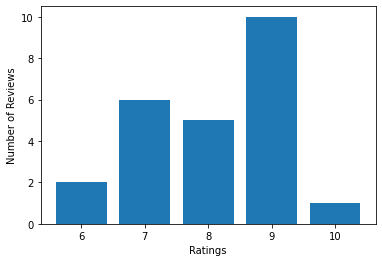

In [9]:
import matplotlib.pyplot as plt

Sentiment_count=movie.groupby('Rating').count()
#Sentiment_count['Review']
plt.bar(Sentiment_count.index.values, Sentiment_count['Review'])
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.show()

### Tokenization

In [8]:
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted characters from data l
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
token

RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)

### Representing text data as BagOfWords(BoW)
The next step is to create a numerical feature vector for each review. BoW counts the number of times that tokens appear in each review of the collection. It returns a matrix with the characteristics:
>Number of columns = number of unique tokens in the whole collection.
>Number of rows = number of documents in the whole collection of documents.
>Every cell contains the frequency of a particular token (column) in a particular document (row).

In [9]:
# We use the class CountVectorizer from scikit-learn library.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts= cv.fit_transform(movie['Review'])
print(text_counts) 

  (0, 3163)	1
  (0, 2377)	1
  (0, 2973)	7
  (0, 1359)	2
  (0, 3157)	2
  (0, 842)	1
  (0, 2172)	2
  (0, 948)	1
  (0, 233)	1
  (0, 3045)	1
  (0, 2224)	1
  (0, 2388)	1
  (0, 541)	1
  (0, 3060)	1
  (0, 2395)	1
  (0, 2753)	1
  (0, 1709)	1
  (0, 2203)	1
  (0, 599)	2
  (0, 1766)	1
  (0, 3195)	1
  (0, 1054)	2
  (0, 238)	1
  (0, 2350)	1
  (0, 2568)	1
  :	:
  (23, 334)	1
  (23, 210)	1
  (23, 3085)	1
  (23, 1217)	1
  (23, 826)	1
  (23, 1789)	1
  (23, 952)	1
  (23, 2065)	1
  (23, 914)	1
  (23, 694)	1
  (23, 2369)	1
  (23, 1013)	1
  (23, 1398)	1
  (23, 1111)	2
  (23, 373)	1
  (23, 1164)	1
  (23, 3008)	1
  (23, 2113)	1
  (23, 830)	1
  (23, 1696)	1
  (23, 1595)	1
  (23, 2426)	1
  (23, 151)	1
  (23, 454)	1
  (23, 255)	1


### Examine the Vocabulary and freqencies

In [10]:
import numpy as np
list(zip(cv.get_feature_names(), np.asarray(text_counts.sum(axis=0)).ravel()))

[('0', 1),
 ('00pm', 1),
 ('1', 2),
 ('10', 12),
 ('100', 2),
 ('10th', 1),
 ('12', 2),
 ('13', 2),
 ('149', 2),
 ('150', 1),
 ('156', 3),
 ('18', 9),
 ('19', 4),
 ('1963', 1),
 ('1991', 1),
 ('1992', 1),
 ('19th', 5),
 ('2', 6),
 ('20', 3),
 ('2008', 4),
 ('2012', 1),
 ('2013', 2),
 ('2014', 2),
 ('2015', 1),
 ('2016', 3),
 ('2018', 3),
 ('2019', 4),
 ('21st', 1),
 ('28', 2),
 ('3', 1),
 ('30', 2),
 ('4', 3),
 ('40', 2),
 ('5', 2),
 ('50', 1),
 ('64', 1),
 ('7', 1),
 ('8', 1),
 ('9', 1),
 ('abandoning', 1),
 ('abilities', 2),
 ('ability', 2),
 ('able', 7),
 ('absences', 1),
 ('absent', 2),
 ('absolutely', 3),
 ('abundance', 1),
 ('academy', 2),
 ('accent', 2),
 ('acceptance', 1),
 ('accepting', 1),
 ('accidents', 1),
 ('accompanied', 1),
 ('accompany', 1),
 ('accomplish', 3),
 ('accomplished', 3),
 ('according', 2),
 ('accordingly', 1),
 ('account', 3),
 ('accustomed', 3),
 ('achieve', 2),
 ('achieved', 2),
 ('achievement', 4),
 ('achieving', 1),
 ('acquire', 3),
 ('acquired', 1),
 ('

### Split the data into training and testing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, movie['Rating'], test_size=0.33, random_state=8)

In [12]:
# sparse matrix
X_train   

<16x3352 sparse matrix of type '<class 'numpy.int64'>'
	with 4664 stored elements in Compressed Sparse Row format>

### Multinomial Naive Bayes Classifier

In [13]:
from sklearn.naive_bayes import MultinomialNB

# Model build and evaluation
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
expected  = y_test

### Test the data

In [14]:
for p, e in zip(predicted, expected):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 9.00, expected: 9.00
predicted: 9.00, expected: 7.00
predicted: 7.00, expected: 7.00
predicted: 9.00, expected: 9.00
predicted: 9.00, expected: 9.00
predicted: 9.00, expected: 9.00
predicted: 7.00, expected: 9.00
predicted: 7.00, expected: 7.00


### Measuring the Accuracy of the model

In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("MultinomialNB Accuracy:",metrics.accuracy_score(predicted,expected))

MultinomialNB Accuracy: 0.75


### Confusion matrix on test data

In [16]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[2 1]
 [1 4]]


1. The diagonal elements show the number of correct classifications for each class i.e. Here for example 4,2 are correct classifications.
2. The off-diagonal elements provides the misclassifications. Here for example both 1's are wrong classifications.

### Additional Experiments

#### Lemmatization using WordNetLemmatizer:
>The WordNetLemmatizer class has a method called lemmatize which takes as arguments a word to lemmatize as well as what part of speech the word happens to be i.e. noun, verb, adverb, etc.

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize a sentence
print(lemmatizer.lemmatize(str(movie['Review'][0]).split('.')[0]))

There are some vague references to things that happen and the usual discussion about plot elements available via trailers and pre-release clips, but I have tried to remain as spoiler-lite as possible


In [18]:
## Define the sentence to be lemmatized
sentence = lemmatizer.lemmatize(str(movie['Review'][0]).split('.')[0])

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(sentence)
print(word_list)

# Lemmatize list of words and join
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(lemmatized_output)

['There', 'are', 'some', 'vague', 'references', 'to', 'things', 'that', 'happen', 'and', 'the', 'usual', 'discussion', 'about', 'plot', 'elements', 'available', 'via', 'trailers', 'and', 'pre-release', 'clips', ',', 'but', 'I', 'have', 'tried', 'to', 'remain', 'as', '\x93spoiler-lite\x94', 'as', 'possible']
There are some vague reference to thing that happen and the usual discussion about plot element available via trailer and pre-release clip , but I have tried to remain a spoiler-lite a possible


**Here if we see some words like 'are' are not lemmatized as expected. Hence we should consider parts of speech while lemmatizing**

In [19]:
# Define function to lemmatize each word with its POS tag
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

# Lemmatize
sentence = lemmatizer.lemmatize(str(movie['Review'][0]).split('.')[0])
print(sentence)
lemmatize_with_postag(sentence)

There are some vague references to things that happen and the usual discussion about plot elements available via trailers and pre-release clips, but I have tried to remain as spoiler-lite as possible


'There be some vague reference to thing that happen and the usual discussion about plot element available via trailer and pre-release clip but I have try to remain as \x93spoiler-lite\x94 a possible'

### Stemming

##### NLTK provides various Stemmer Algorithms. Here we implemented LancasterStemmer and SnowballStemmer

In [20]:
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')

In [21]:
for word in word_list:
    print(lancaster.stem(word))

ther
ar
som
vagu
ref
to
thing
that
hap
and
the
us
discuss
about
plot
el
avail
via
trail
and
pre-releas
clip
,
but
i
hav
tri
to
remain
as
spoiler-lite
as
poss


In [22]:
for word in word_list:
    print(snowball.stem(word))

there
are
some
vagu
refer
to
thing
that
happen
and
the
usual
discuss
about
plot
element
avail
via
trailer
and
pre-releas
clip
,
but
i
have
tri
to
remain
as
spoiler-lite
as
possibl


**Note that each stemming algorithm provides a different output.**

## Similarity Analysis on two sets of reviews

In [23]:
import spacy
import pandas as pd

nlp = spacy.load('en')  

In [24]:
import sys
import warnings
 
warnings.filterwarnings("ignore") #Code to ignore warnings from getting displayed

### Read data from two datasets
We did sentiment analysis on Avengers.csv , now we will do similarity with review for Joker movie.

In [25]:
movie1=pd.read_csv('Avengers.csv',delimiter=',',encoding='unicode_escape')
movie2=pd.read_csv('Jokers.csv',delimiter=',',encoding='unicode_escape')
movie1.head(13)


,Rating,Review,Reviewer
0,9,There are some vague references to things that...,James Berardinelli
1,7,It must have taken a superhuman effort to pull...,JEFFREY M. ANDERSON
2,7,"Considered on its own, as a single, nearly 2-h...",A.O. Scott
3,8,If a movie can be defined by the strength of i...,Louise Keller
4,7,"Ten years and 18 Marvel movies; 19 now, with t...",MaryAnn Johanson
5,9,I try to write things that are spoiler free (f...,Nathaniel R. Mitchell
6,9,Thanos (Josh Brolin) has arrived and he wants ...,JP Roscoe
7,7,Listing the cast members may take longer than ...,Doug Fisher
8,9,"For their 19th film, the Marvel Cinematic Univ...",Brian Orndorf
9,7,"Even with a very large cast of characters, thi...",Anthony


In [26]:
movie2.head()

,Rating,Review,Reviewer
0,4.5,"In the Batman universe, there are two kinds of...",James Berardinelli
1,3.5,Joker is a comic book movie as filtered thro...,Jeffrey M. Anderson
2,4.0,Since its debut a few weeks ago at the Venice ...,A.O. Scott
3,4.5,"Edgy and darkly disturbing, Joker takes flight...",Louise Keller
4,1.5,"Alas, the only remotely entertaining or even m...",MaryAnn Johanson


### Convert reviews to nlp documents type for both movies

In [27]:
movie1['Review_nlp'] = movie1['Review'].apply(lambda x: nlp((x)))

In [28]:
movie2['Review_nlp'] = movie2['Review'].apply(lambda x: nlp(x))

### Calculate similarity of reviews using spacy.
#### Calculating similarity score between each review from first set with each review from second set. 

In [29]:
dt={} #empty dictionary to store similarity score per reviewer pair
for rev1,r1 in zip(movie1['Reviewer'],movie1['Review_nlp']):
    for rev2,r2 in zip(movie2['Reviewer'],movie2['Review_nlp']):
        dt[rev1,rev2]=r1.similarity(r2)        

### Calculations of accuracy of similarity score calculated above
#### Since after above calculations similarity scores are high,we are considering similarity if score is greater than 90%

In [30]:
correct_pos=0
correct_neg=0
false_pos=0
false_neg=0
total=0
for key,value in dt.items():
    #print(list(key),value)
    total+=1
    if str(list(key)[0]).lower()==str(list(key)[1]).lower() and value*100 > 90:
        correct_pos+=1
        print(list(key),value)
    elif str(list(key)[0]).lower()==str(list(key)[1]).lower() and value*100 < 90:
        false_neg+=1
    elif str(list(key)[0]).lower()!=str(list(key)[1]).lower() and value*100 > 90:
        false_pos+=1
    elif str(list(key)[0]).lower()!=str(list(key)[1]).lower() and value*100 < 90:
        correct_neg+=1

['James Berardinelli', 'James Berardinelli'] 0.9871946870650147
['JEFFREY M. ANDERSON', 'Jeffrey M. Anderson'] 0.9401306685105196
['\xa0A.O. Scott', '\xa0A.O. Scott'] 0.9770719725418836
['Louise Keller', 'Louise Keller'] 0.9429127320593583
['MaryAnn Johanson', 'MaryAnn Johanson'] 0.9691359943016407
['Nathaniel R. Mitchell', 'Nathaniel R. Mitchell'] 0.9745974238812629
['JP Roscoe', 'JP Roscoe'] 0.9794450181438646
['Doug Fisher', 'Doug Fisher'] 0.9565542129216947
['Brian Orndorf', 'Brian Orndorf'] 0.982109863278267
['Anthony', 'Anthony'] 0.9640639550547744
['Marc Eastman', 'Marc Eastman'] 0.9722217228038148
['Kyle Saubert', 'Kyle Saubert'] 0.9707529435676392


In [31]:
print("Correct count",correct_pos)

Correct count 12


In [32]:
print("False Positive",false_pos)

False Positive 239


In [33]:
print("True Negative",correct_neg)

True Negative 37


In [34]:
print("False Negative",false_neg)
print("Total Pairs",total)

False Negative 0
Total Pairs 288


### Score for how well the analysis predicted the same author.
For computing the score we can see how many false positives and negatives vs actual positives the analyzer computed.
>Accuracy Score=items classified correctly\all items classified

In our calculations items classified correctly will be correct positive(matching reviewers)+correct negative(low similarity for different reviewers)

In [35]:
score=(correct_pos+correct_neg)/total
print(f'{score*100:.2f}%')

17.01%


### Conclusions:
From above similarity analysis we can conclude that:
- There were no False Negative i.e algorithm was able to identify similarities in text of same reviewers from both sets.
- For same reviewer , similarity score is greater than 94%.
- But for different pair of reviewers also we got match i.e there were huge false positives.
- This analysis though gave correct match for matching reviewers but there were false positives which creates a doubt on the accuracy of this algorithm.
- One possible reason for that is, since we are using movie review and words and genre also influences the tone and language of review, there might have been similarity in words and sentiment used, which resulted in similarity among different reviewers.
- Method we used will be based on the tagger, parser and NER and not on vectors as module we loaded  don't ship with word vectors and only use context-sensitive tensors.Hence, similarity prediction will get false positives.

### Use Cosine formula to calculate similarity
Cosine similarity calculates similarity by measuring the cosine of angle between two vectors.With cosine similarity, we need to convert sentences into vectors

In [36]:
#Function to calculate similarity between two texts using cosine function
def similar(X,Y):
# Program to measure similarity between  
# two sentences using cosine similarity. 
    from nltk.corpus import stopwords 
    from nltk.tokenize import word_tokenize 
    from scipy.spatial.distance import cosine



    # tokenization 
    X_list = word_tokenize(X)  
    Y_list = word_tokenize(Y) 

    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    l1 =[];l2 =[] 

    # remove stop words from string 
    X_set = {w for w in X_list if not w in sw}  
    Y_set = {w for w in Y_list if not w in sw} 

    # form a set containing keywords of both strings  
    rvector = X_set.union(Y_set)  
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0

    cosine=1 - cosine(l1, l2)
    return cosine


In [37]:
dt_cos={}
for rev1,r1 in zip(movie1['Reviewer'],movie1['Review_nlp']):
    for rev2,r2 in zip(movie2['Reviewer'],movie2['Review_nlp']):
        sim=similar(str(r1),str(r2))
        dt_cos[rev1,rev2]=sim

In [38]:
for key,value in dt_cos.items():
    #print(list(key),value)
    if list(key)[0].lower()==list(key)[1].lower() :
        print(list(key),value*100)

['James Berardinelli', 'James Berardinelli'] 16.42436111940708
['JEFFREY M. ANDERSON', 'Jeffrey M. Anderson'] 11.875241547680382
['\xa0A.O. Scott', '\xa0A.O. Scott'] 16.59973446562184
['Louise Keller', 'Louise Keller'] 11.59109244835429
['MaryAnn Johanson', 'MaryAnn Johanson'] 14.199986979256662
['Nathaniel R. Mitchell', 'Nathaniel R. Mitchell'] 24.531448232566976
['JP Roscoe', 'JP Roscoe'] 15.992918923606148
['Doug Fisher', 'Doug Fisher'] 12.353441144022892
['Brian Orndorf', 'Brian Orndorf'] 15.59893159319926
['Anthony', 'Anthony'] 26.272001939513757
['Marc Eastman', 'Marc Eastman'] 19.132444176530793
['Kyle Saubert', 'Kyle Saubert'] 21.958178920326855


### Jaccard method for similarity
Jaccard similarity or intersection over union is defined as size of intersection divided by size of union of two sets. 

In [39]:
#Jaccard method to calculate similarity
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [40]:
dt_jacc={}
for rev1,r1 in zip(movie1['Reviewer'],movie1['Review_nlp']):
    for rev2,r2 in zip(movie2['Reviewer'],movie2['Review_nlp']):
        sim=get_jaccard_sim(str(r1),str(r2))
        dt_jacc[rev1,rev2]=sim

In [41]:
for key,value in dt_cos.items():
    #print(list(key),value)
    if list(key)[0].lower()==list(key)[1].lower() :
        print(list(key),value*100)

['James Berardinelli', 'James Berardinelli'] 16.42436111940708
['JEFFREY M. ANDERSON', 'Jeffrey M. Anderson'] 11.875241547680382
['\xa0A.O. Scott', '\xa0A.O. Scott'] 16.59973446562184
['Louise Keller', 'Louise Keller'] 11.59109244835429
['MaryAnn Johanson', 'MaryAnn Johanson'] 14.199986979256662
['Nathaniel R. Mitchell', 'Nathaniel R. Mitchell'] 24.531448232566976
['JP Roscoe', 'JP Roscoe'] 15.992918923606148
['Doug Fisher', 'Doug Fisher'] 12.353441144022892
['Brian Orndorf', 'Brian Orndorf'] 15.59893159319926
['Anthony', 'Anthony'] 26.272001939513757
['Marc Eastman', 'Marc Eastman'] 19.132444176530793
['Kyle Saubert', 'Kyle Saubert'] 21.958178920326855


### Conclusion on Cosine and Jaccard method
- Both Jaccard and cosine method has very low scores for similarity and we can not predict which pair of reviews were written by same reviewer.
- Jaccard similarity takes only unique set of words for each sentence / document while cosine similarity takes total length of the vectors.
- Jaccard similarity is good for cases where duplication does not matter, cosine similarity is good for cases where duplication matters while analyzing text similarity. For two product descriptions, it will be better to use Jaccard similarity as repetition of a word does not reduce their similarity.

`Low similarity scores might be because both the movies are of different genres and might require different context for reviewing. However, reviewers often use similar words for reviewing a movie hence we get some similarity in text from both the sets.`

## Other Experiments

### Word Frequency
In class examples we used TextBlob to get word counts. Here we have used FreqDist from nltk library to get counts of word in each review.

In [42]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize

In [43]:
fdist = FreqDist(word.lower() for word in word_tokenize(str(movie1['Review'][0])))

In [44]:
fdist.most_common(10)

[('the', 79),
 ('.', 54),
 (',', 51),
 ('a', 40),
 ('of', 36),
 ('and', 34),
 ('to', 29),
 ('in', 20),
 ('(', 20),
 (')', 20)]

### There are many stop words. Taking the count after removing stop words and also punctuations.
For punctuation we will import string library

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
from nltk.corpus import stopwords
 
stopwords_english = stopwords.words('english')


In [47]:
words_clean = []
for word in word_tokenize(str(movie1['Review'][0])):
    if word not in stopwords_english and word not in string.punctuation:
        words_clean.append(word)
 
print(words_clean[:10])

['There', 'vague', 'references', 'things', 'happen', 'usual', 'discussion', 'plot', 'elements', 'available']


In [48]:
fdist_new = FreqDist(words_clean)
fdist_new.most_common(10)

[('Infinity', 11),
 ('War', 11),
 ('movie', 10),
 ('The', 9),
 ('things', 7),
 ('film', 7),
 ('\x96', 7),
 ('Avengers', 6),
 ('characters', 5),
 ('time', 5)]

### Translation
Using different variations of function covered in class and on the first review of movie Avenger

In [49]:
from textblob import TextBlob

text = str(movie2['Review'][0]) #select first review of Joker movie
blob = TextBlob(text)

In [50]:
bt=blob.translate(from_lang='en',to='fr') #translate it to french

In [51]:
eng=blob.translate(from_lang='fr',to='en') #translate back to french

In [52]:
sim_trns=nlp(str(eng)).similarity(nlp(str(blob))) #check with above translated text with original review

In [53]:
print(f"Similarity after translation back to english with original review in english is :{sim_trns*100}%")

Similarity after translation back to english with original review in english is :97.91985717566446%


#### Conclusion : We see above that some meaning is lost in transalation hence similarity is not 100%

#### Subjectivity of text in review(value returned is between 0 and 1) 

In [54]:
blob.subjectivity #Returns the subjectivity score of text

0.4364847725374041

### n-Grams
There are explicit functions for bigrams and trigrams in nltk, apart for ngram function in textblob library discussed in class

In [55]:
import nltk
words = nltk.word_tokenize(str(movie1['Review'][0]))
my_bigrams = nltk.bigrams(words)
my_trigrams = nltk.trigrams(words)

In [56]:
list(my_bigrams)[:9]

[('There', 'are'),
 ('are', 'some'),
 ('some', 'vague'),
 ('vague', 'references'),
 ('references', 'to'),
 ('to', 'things'),
 ('things', 'that'),
 ('that', 'happen'),
 ('happen', 'and')]

In [57]:
list(my_trigrams)[:10]

[('There', 'are', 'some'),
 ('are', 'some', 'vague'),
 ('some', 'vague', 'references'),
 ('vague', 'references', 'to'),
 ('references', 'to', 'things'),
 ('to', 'things', 'that'),
 ('things', 'that', 'happen'),
 ('that', 'happen', 'and'),
 ('happen', 'and', 'the'),
 ('and', 'the', 'usual')]

### Experiment to check most common words in all the reviews of a movie

In [58]:
words_movie1 = []
punc=string.punctuation+'’'+'“'+'”' #string to hold punctuations that appear in text
for line in (movie2['Review']):
    for word in word_tokenize(line):
        if word not in stopwords_english and word not in punc:
            words_movie1.append(word)

In [59]:
word_count_movie1 = FreqDist(words_movie1) #Get the word count using FreqDist function
word_count_movie1.most_common(30) #print top 30 words in all the reviews of movie Joker

[('Joker', 84),
 ('The', 67),
 ('Arthur', 63),
 ('I', 45),
 ('film', 44),
 ('movie', 43),
 ("'s", 42),
 ('Phoenix', 37),
 ('story', 29),
 ('one', 27),
 ('character', 27),
 ('Batman', 26),
 ('Phillips', 26),
 ('like', 26),
 ('he\x92s', 25),
 ('even', 24),
 ('also', 24),
 ('It', 24),
 ('see', 23),
 ('He', 22),
 ('This', 21),
 ('Gotham', 21),
 ('comic', 19),
 ('It\x92s', 19),
 ('Joaquin', 18),
 ('clown', 18),
 ('people', 18),
 ('book', 17),
 ('mother', 17),
 ('world', 17)]